# Advanced

## Task 02: Combine topic modeling with network analysis to explore relationships between authors, texts, or genres in medieval literature.

Description: Create a network where nodes represent entities (e.g., authors, texts) and edges represent topic similarity. The code applies topic modeling (LDA) to analyze a corpus of medieval texts. It then constructs a network graph where nodes represent texts, and edges connect texts with similar topic distributions. The network visualization reveals clusters (communities) of related texts, and provides a visual representation of the thematic relationships within the corpus.

Hints:

- Use the topic distributions of texts to calculate similarity measures
- Visualize the network to identify clusters or communities.ith different model architectures (e.g., LDA with linguistic constraints).


**Libraries:**

* **nltk:**
   * `tokenize`: Splits text into words.
* **gensim:**
    * `corpora`: Creates a dictionary and corpus for topic modeling.
    * `models`: Provides the LDA model implementation.
* **string:**  Handles string manipulations.
* **numpy:** Performs numerical calculations.
* **matplotlib.pyplot:**  Visualizes the network graph.
* **networkx:** Builds and manipulates network graphs.
* **scipy:** Calculates cosine similarity to determine text similarity.
* **collections.defaultdict:** Provides convenient dictionary-like storage.
* **re:** Provides regular expression matching operations (not explicitly used in this code, but potentially helpful for preprocessing).

**Code Walkthrough:**

1. **Preprocessing:**
   * A function `preprocess_medieval_text` is defined to clean and tokenize the text data.
   * Sample medieval texts are loaded along with their metadata (title, author, language, and the text itself).
   * The texts are preprocessed using the defined function.

2. **Topic Modeling:**
   * A dictionary is created from the processed texts, mapping words to numerical IDs.
   * A corpus is created, representing each text as a bag of words.
   * An LDA model is trained with the specified number of topics (5 in this example).

3. **Network Construction:**
   * A function `calculate_similarity` is defined to compute the similarity between texts based on their topic distributions (using cosine similarity).
   * A network graph `G` is created, and nodes are added for each text with their metadata.
   * Edges are added between pairs of texts if their similarity exceeds a certain threshold (0.3 in this case). The weight of each edge reflects the similarity between the connected texts.

4. **Visualization:**
   * The network graph is visualized using `matplotlib.pyplot` and `networkx`. Nodes represent texts, edges represent similarity links, and the width of each edge indicates the degree of similarity. Node labels display the titles of the texts.

5. **Analysis and Output:**
   * Node and edge information is printed to the console, detailing text titles, authors, languages, and similarity values.
   * Communities (clusters) of related texts are identified using a modularity-based algorithm and printed.
   * Top words for each LDA topic are printed to understand the thematic content of each cluster.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


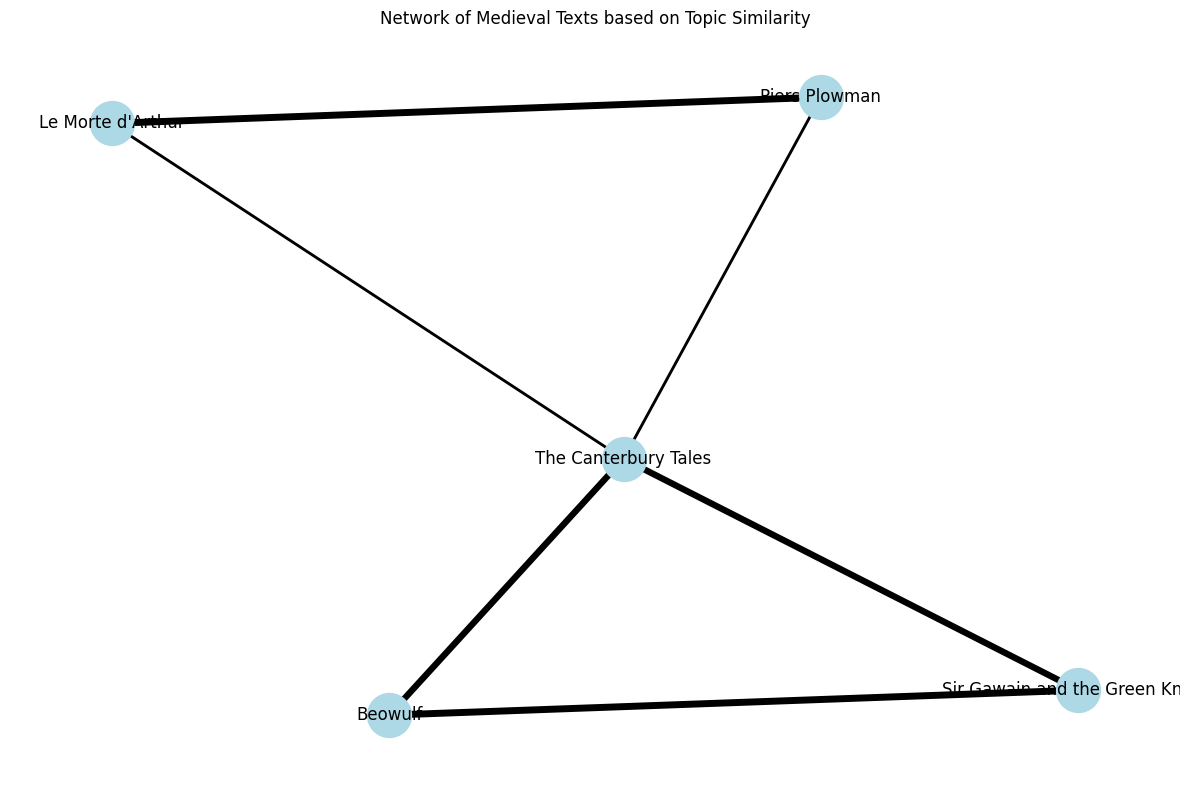

Node information:
Node 0: Beowulf by Anonymous (Old English)
Node 1: The Canterbury Tales by Geoffrey Chaucer (Middle English)
Node 2: Le Morte d'Arthur by Thomas Malory (Middle English)
Node 3: Piers Plowman by William Langland (Middle English)
Node 4: Sir Gawain and the Green Knight by Anonymous (Middle English)

Edge information:
Edge between Beowulf and The Canterbury Tales: similarity = 0.92
Edge between Beowulf and Sir Gawain and the Green Knight: similarity = 1.00
Edge between The Canterbury Tales and Le Morte d'Arthur: similarity = 0.41
Edge between The Canterbury Tales and Piers Plowman: similarity = 0.41
Edge between The Canterbury Tales and Sir Gawain and the Green Knight: similarity = 0.92
Edge between Le Morte d'Arthur and Piers Plowman: similarity = 1.00

Identified communities:
Community 1: ['Beowulf', 'The Canterbury Tales', 'Sir Gawain and the Green Knight']
Community 2: ["Le Morte d'Arthur", 'Piers Plowman']

Top words for each topic:
Topic: 0 
Words: 0.059*"and" + 0.

In [1]:
import nltk
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial.distance import cosine

# Download necessary NLTK data
nltk.download('punkt')

# 1. Preprocessing function
def preprocess_medieval_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation and not token.isdigit()]
    stopwords = set(['et', 'in', 'ad', 'ut', 'cum', 'non', 'qui', 'ab', 'ex', 'de'])
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

# 2. Sample medieval texts with metadata
texts = [
    ("Beowulf", "Anonymous", "Old English", "Hwæt! We Gardena in geardagum þeodcyninga, þrym gefrunon, hu ða æþelingas ellen fremedon."),
    ("The Canterbury Tales", "Geoffrey Chaucer", "Middle English", "Whan that Aprille with his shoures soote The droghte of Marche hath perced to the roote"),
    ("Le Morte d'Arthur", "Thomas Malory", "Middle English", "It befell in the days of Uther Pendragon, when he was king of all England, and so reigned"),
    ("Piers Plowman", "William Langland", "Middle English", "In a somer seson, whan softe was the sonne, I shoop me into shroudes as I a sheep were"),
    ("Sir Gawain and the Green Knight", "Anonymous", "Middle English", "Siþen þe sege and þe assaut watz sesed at Troye, þe borȝ brittened and brent to brondeȝ and askez"),
]

# 3. Preprocess texts
processed_texts = [preprocess_medieval_text(text[3]) for text in texts]

# 4. Create dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# 5. Train LDA model
num_topics = 5
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# 6. Get topic distributions for each text
text_topic_distributions = [lda_model.get_document_topics(bow) for bow in corpus]

# 7. Calculate similarity between texts
def calculate_similarity(dist1, dist2):
    "SOMETHING IS MISSING"
    "SOMETHING IS MISSING"
    for topic, weight in dist1:
        vec1[topic] = weight
    for topic, weight in dist2:
        vec2[topic] = weight
    return 1 - cosine(vec1, vec2)  # Convert distance to similarity

# 8. Create network
G = nx.Graph()

for i, (title, author, language, "ONE CHAR IS MISSING") in enumerate(texts):
    G.add_node(i, title=title, author=author, language=language)

for i in range(len(texts)):
    for j in range(i+1, len(texts)):
        similarity = calculate_similarity(text_topic_distributions[i], text_topic_distributions[j])
        if similarity > 0.3:  # Only add edges for sufficiently similar texts
            G.add_edge(i, j, weight=similarity)

# 9. Visualize network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] * 5 for u,v in G.edges()])
nx.draw_networkx_labels(G, pos, {i: data['title'] for i, data in G.nodes(data=True)})

plt.title("Network of Medieval Texts based on Topic Similarity")
plt.axis('off')
plt.tight_layout()
plt.show()

# 10. Print additional information
print("Node information:")
for i, data in G.nodes(data=True):
    print(f"Node {i}: {data['title']} by {data['author']} ({data['language']})")

print("\nEdge information:")
for u, v, data in G.edges(data=True):
    print(f"Edge between {G.nodes[u]['title']} and {G.nodes[v]['title']}: similarity = {data['weight']:.2f}")

# 11. Identify communities
communities = list(nx.community.greedy_modularity_communities(G))
print("\nIdentified communities:")
for i, community in enumerate(communities):
    print(f"Community {i+1}: {[G.nodes[node]['title'] for node in community]}")

# 12. Print top topics
print("\nTop words for each topic:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

## Solution

1.
```
def calculate_similarity(dist1, dist2):
    vec1 = [0] * num_topics
    vec2 = [0] * num_topics
    for topic, weight in dist1:
        vec1[topic] = weight
    for topic, weight in dist2:
        vec2[topic] = weight
    return 1 - cosine(vec1, vec2)  # Convert distance to similarity

```



2. ``` for i, (title, author, language, _) in enumerate(texts): ```